# Attempt to solve Fashion MNIST Dataset using Dense Neural Network
## Bibliography 
* Keras official Tutorial
* Deep Learning with Python by François Chollet

## About DataSet 
**Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.**


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import os
import tensorflow

# Load Dataset and Split it to test and train set

see this link
https://medium.com/the-data-science-publication/how-to-import-and-display-the-fashion-mnist-dataset-using-tensorflow-e72522f684d0

In [ ]:
#Getting training and testing data from tensorflow
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

28*28 image pixels

In [ ]:
#Training Set shape
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)


In [ ]:
#Test Set consists of 10000 samples with one label field and 28*28 image pixels
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
X_train = X_train.reshape(-1,28*28)

X_test = X_test.reshape(-1,28*28)

In [ ]:
#Labels from 0 to 9 are following Items 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Split training data to train and valid

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=.10, random_state=0, stratify=y_train)

In [ ]:
#Training Set shape
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))

X_train: (54000, 784)
Y_train: (54000,)


In [ ]:
#Training Set shape
print('X_val: ' + str(X_val.shape))
print('y_val: ' + str(y_val.shape))

X_val: (6000, 784)
y_val: (6000,)


## Some images with their labels 

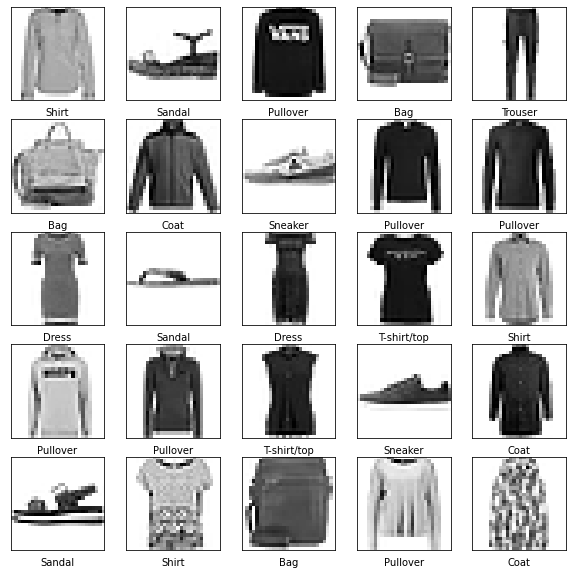

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(X_train[i]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# Rescaling training to range 0 to 1 by dividing them by 255
X_train = X_train / 255.0

X_val = X_val / 255.0

X_test = X_test / 255.0

In [ ]:
y_train[0]

6

**Creating a Deep Neural Network with any number of layer you want.**

In [ ]:
model = models.Sequential()

model.add(layers.Dense(256,activation='relu',input_shape=(784,)))

model.add(layers.Dropout(0.25))

model.add(layers.Dense(256,activation='relu'))

model.add(layers.Dropout(0.25))

model.add(layers.Dense(256,activation='relu'))

model.add(layers.Dropout(0.25))

model.add(layers.Dense(10,activation='softmax'))

**Compiling the model.**

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_262 (Dense)           (None, 256)               200960    
                                                                 
 dropout_212 (Dropout)       (None, 256)               0         
                                                                 
 dense_263 (Dense)           (None, 256)               65792     
                                                                 
 dropout_213 (Dropout)       (None, 256)               0         
                                                                 
 dense_264 (Dense)           (None, 256)               65792     
                                                                 
 dropout_214 (Dropout)       (None, 256)               0         
                                                                 
 dense_265 (Dense)           (None, 10)              

In [ ]:
Early_Stopping = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 10 , restore_best_weights = True, verbose=1)

callbacks = [Early_Stopping]

**Training model with a part of training data and evaluating it with another part of training data
and get more than 90% val_acc**

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=100, batch_size=64, callbacks=callbacks)

Epoch 1/100
844/844 [==============================] - 5s 4ms/step - loss: 0.5883 - accuracy: 0.7867 - val_loss: 0.4063 - val_accuracy: 0.8513
Epoch 2/100
844/844 [==============================] - 3s 4ms/step - loss: 0.4281 - accuracy: 0.8438 - val_loss: 0.3818 - val_accuracy: 0.8580
Epoch 3/100
844/844 [==============================] - 3s 4ms/step - loss: 0.3939 - accuracy: 0.8550 - val_loss: 0.3455 - val_accuracy: 0.8717
Epoch 4/100
844/844 [==============================] - 3s 4ms/step - loss: 0.3706 - accuracy: 0.8637 - val_loss: 0.3332 - val_accuracy: 0.8725
Epoch 5/100
844/844 [==============================] - 3s 4ms/step - loss: 0.3560 - accuracy: 0.8695 - val_loss: 0.3304 - val_accuracy: 0.8773
Epoch 6/100
844/844 [==============================] - 3s 4ms/step - loss: 0.3433 - accuracy: 0.8743 - val_loss: 0.3239 - val_accuracy: 0.8747
Epoch 7/100
844/844 [==============================] - 3s 4ms/step - loss: 0.3336 - accuracy: 0.8760 - val_loss: 0.3112 - val_accuracy: 0.8853

# Visualize Model Training History in Keras

See this link
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

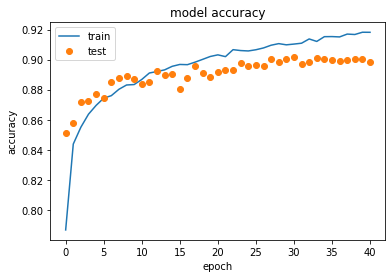

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

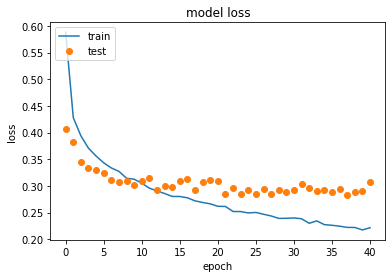

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate the model with our Test Set Using confusion_matrix

-split data to X_test and Y_test
-Rescaling training to range 0 to 1 by dividing them by 255

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3287 - accuracy: 0.8879


[0.3287128806114197, 0.8878999948501587]

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[0]

9

visualization

[Text(0, 0.5, 'T-shirt/top'),
 Text(0, 1.5, 'Trouser'),
 Text(0, 2.5, 'Pullover'),
 Text(0, 3.5, 'Dress'),
 Text(0, 4.5, 'Coat'),
 Text(0, 5.5, 'Sandal'),
 Text(0, 6.5, 'Shirt'),
 Text(0, 7.5, 'Sneaker'),
 Text(0, 8.5, 'Bag'),
 Text(0, 9.5, 'Ankle boot')]

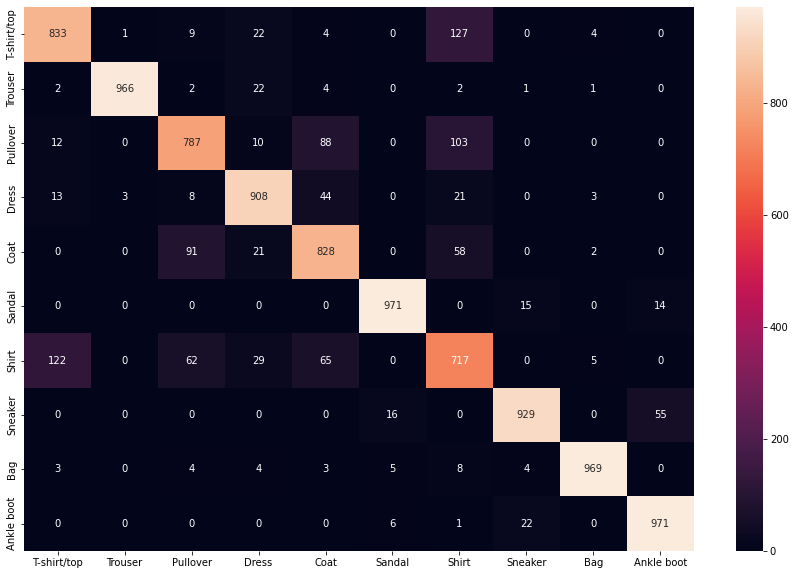

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

fig , ax= plt.subplots(figsize=(15,10))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True , fmt='g', ax=ax)

ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

Find classification_report for the prediction

In [ ]:
ClassificationReport = classification_report(y_test, y_pred, target_names=class_names)

print(ClassificationReport)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.83      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.82      0.79      0.80      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.80      0.83      0.81      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.69      0.72      0.70      1000
     Sneaker       0.96      0.93      0.94      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.93      0.97      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

